# 1.0 Existing Customer Demographic

## Importing needed packages

In [1]:
# Importing needed packages
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from datetime import date
import math as ma
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the xlsx file 
CustomerDemo = pd.read_excel('CustomerDemographic.xlsx')
CustomerDemo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,68,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,41,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,68,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,60,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,44,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,46,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,20,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,0,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,48,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [3]:
# check if there is NA for each columns

def NA_checker():
    res = []
    temp = list(CustomerDemo)
    for x in temp:
        res.append(CustomerDemo[x].isna().sum())
    return res

listofNAN = NA_checker()
print(listofNAN, len(listofNAN))

[0, 0, 125, 0, 0, 87, 0, 506, 656, 0, 0, 302, 0, 87] 14


## Analysing the gender vs purchased bikes

In [4]:
# Let it be Female, Male, Unknown
gender = [0,0,0] 
for each in CustomerDemo['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

[2039, 1873, 88]


In [5]:
# Let the first be Female and F, second be Male and M and lastly Unknown (U)
bike = [0,0,0]
bike[0] += CustomerDemo['past_3_years_bike_related_purchases'][CustomerDemo['gender'] == 'Female'].sum() + CustomerDemo['past_3_years_bike_related_purchases'][CustomerDemo['gender'] == 'F'].sum()
bike[1] += CustomerDemo['past_3_years_bike_related_purchases'][CustomerDemo['gender'] == 'Male'].sum() + CustomerDemo['past_3_years_bike_related_purchases'][CustomerDemo['gender'] == 'M'].sum()
bike[2] += CustomerDemo['past_3_years_bike_related_purchases'][CustomerDemo['gender'] == 'U'].sum()

print(bike)

[98357, 93483, 3718]


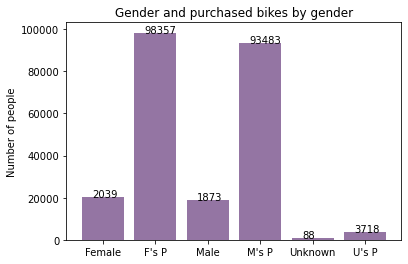

In [6]:
graph0 = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graph1 = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colour = (0.3,0.1,0.4,0.6)

def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

#scale gender up by 10 for clearer visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.set_title('Gender and purchased bikes by gender')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graph1, color = colour)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graph1[i]+0.1, s = graph0[i], size = 10)

# F's P = Female's Purchase
# M's P = Male's Purchase 
# U's P = Unknown's Purchase
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
plt.show()

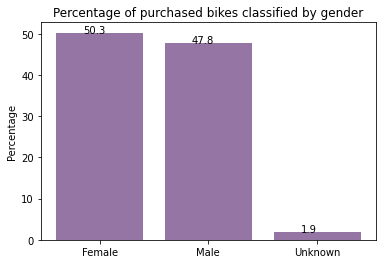

In [7]:
# to calculate the percentage of purchased bikes classified by gender
avg  = [0,0,0]
total   = sum(bike)
for i in range(len(avg)):
    avg[i] += (round(bike[i]/total,3)*100) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_title('Percentage of purchased bikes classified by gender')
ax1.set_ylabel('Percentage')
plt.bar(x1, avg, color = colour)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))
plt.show()

## Analysing the age vs purchased bikes

In [8]:
# to find out the average for female, male and unknown gender
stdv = []
total = 0
temp = [0,0,0]

for each in CustomerDemo['gender']:
    j = 1
    if each[0] == "F" and CustomerDemo['Age'][j] != 0:
        total += CustomerDemo['Age'][j]
        stdv.append((CustomerDemo['Age'][j]))
        temp[0] += 1
    elif each[0] == "M" and CustomerDemo['Age'][j] != 0:
        total += CustomerDemo['Age'][j]
        stdv.append((CustomerDemo['Age'][j]))
        temp[1] += 1
    elif CustomerDemo['Age'][j] != 0:
        total += CustomerDemo['Age'][j]
        stdv.append((CustomerDemo['Age'][j]))
        temp[2] += 1
    j+=1
    
print(temp)
# since the count of unknown gender is relatively low compared to female and male, will not take into account of 
# gender u

[2039, 1873, 88]


In [9]:
# to calculate the average age in general
average = round(total/(temp[0]+ temp[1]),0)
stdv_val = 34.0
print(average)

42.0


The average age is 42
The standard deviation of age is 34

In [17]:
#purchases from age 42 - 34/2, 42, 42 + 34/2 
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = average - stdv_val/2
sq = average
tq = average + stdv_val/2
print(fq, sq, tq)

for each in CustomerDemo['gender']:
    counter = 1
    temp = int(CustomerDemo['Age'][counter])
    bkt  = int(CustomerDemo['past_3_years_bike_related_purchases'][counter])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    counter += 1
    
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

25.0 42.0 59.0


In [22]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))

273 775 778 213


In [23]:
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

259 747 653 213


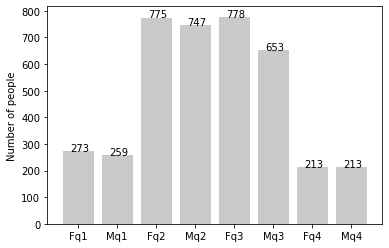

In [24]:
graphgen = [273, 259, 775, 747, 778, 653, 213, 213]
colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))
plt.show()

## Checking the job industry category of our customer

In [26]:
CustomerDemo["job_industry_category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

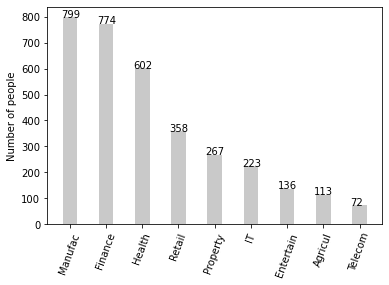

In [28]:
# plotting the bar chart
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colorr = (0.7,0.7,0.7,0.7)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manufac", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agricul", "Telecom"))
plt.xticks(rotation=70)
plt.show()

## Checking the wealth segment of our customer

In [31]:
CustomerDemo["wealth_segment"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [40]:
#split into 3: M (Mass), H(High), A(Affluent)
count = 1
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}


for each in CustomerDemo['wealth_segment']:
    temp = int(CustomerDemo['Age'][count])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    count += 1
print("Mass: ", len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print("High: ", len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print("Affluent: ", len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

Mass:  261 777 697 219
High:  125 399 361 111
Affluent:  146 346 470 0


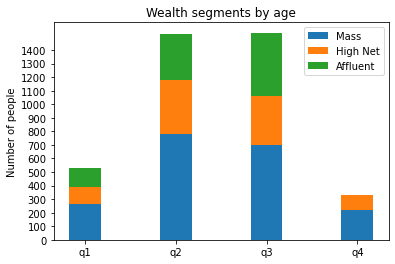

In [44]:
N = 4
mass = [261, 777, 697, 219]
high = [125, 399, 361, 111]
affluent = [146, 346, 470, 0]

bars = np.add(mass, high).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) 
width = 0.35

p1 = plt.bar(ind, mass, width)
p2 = plt.bar(ind, high, width,  bottom=mass)
p3 = plt.bar(ind, affluent, width,  bottom=bars)

plt.ylabel('Number of people')
plt.title('Wealth segments by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))
plt.show()

## Checking how many of our customer own a car

In [45]:
CustomerDemo["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

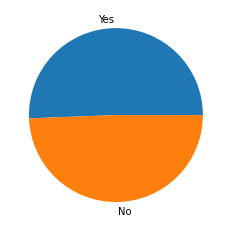

In [77]:
y = np.array([2024, 1976])
mylabels = ["Yes", "No"]
plt.pie(y, labels = mylabels)
plt.show() 

# 2.0 New Customer Demographic

In [46]:
# read the xlsx file 
newcust = pd.read_excel('NewCustomerList.xlsx')
newcust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,64,General Manager,Manufacturing,Mass Customer,N,...,QLD,Australia,6,0.92,1.1500,1.43750,1.221875,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,51,Structural Engineer,Property,Mass Customer,N,...,NSW,Australia,11,1.00,1.0000,1.25000,1.062500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,47,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,VIC,Australia,5,0.90,0.9000,0.90000,0.900000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,43,Account Representative III,Manufacturing,Affluent Customer,N,...,QLD,Australia,1,1.03,1.2875,1.28750,1.287500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,56,Financial Analyst,Financial Services,Affluent Customer,N,...,NSW,Australia,9,0.78,0.7800,0.97500,0.975000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,62,Paralegal,Financial Services,Affluent Customer,N,...,NSW,Australia,7,0.90,0.9000,0.90000,0.900000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,20,Senior Sales Associate,Health,Mass Customer,N,...,NSW,Australia,10,0.91,0.9100,1.13750,0.966875,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,67,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,QLD,Australia,2,0.45,0.5625,0.56250,0.562500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,69,Financial Advisor,Financial Services,Mass Customer,N,...,QLD,Australia,2,0.55,0.6875,0.68750,0.584375,997,997,0.357000


In [47]:
# check if there is NA for each columns

def NA_checker():
    res = []
    temp = list(newcust)
    for x in temp:
        res.append(newcust[x].isna().sum())
    return res

listofNAN = NA_checker()
print(listofNAN, len(listofNAN))

[0, 29, 0, 0, 17, 0, 106, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 24


In [48]:
newcust["gender"].unique() 
# There is no F or M

array(['Male', 'Female', 'U'], dtype=object)

## Analysing the gender vs purchased bikes

In [49]:
# Let it be Female, Male, Unknown
gender = [0,0,0] 
for each in newcust['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

[513, 470, 17]


In [50]:
# Let the first be Female and F, second be Male and M and lastly Unknown (U)
bike = [0,0,0]
bike[0] += newcust['past_3_years_bike_related_purchases'][newcust['gender'] == 'Female'].sum() 
bike[1] += newcust['past_3_years_bike_related_purchases'][newcust['gender'] == 'Male'].sum() 
bike[2] += newcust['past_3_years_bike_related_purchases'][newcust['gender'] == 'U'].sum()

print(bike)

[25212, 23765, 859]


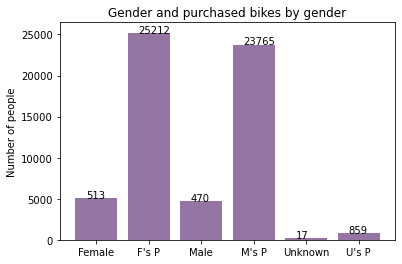

In [51]:
graph0 = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graph1 = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colour = (0.3,0.1,0.4,0.6)

def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

#scale gender up by 10 for clearer visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.set_title('Gender and purchased bikes by gender')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graph1, color = colour)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graph1[i]+0.1, s = graph0[i], size = 10)

# F's P = Female's Purchase
# M's P = Male's Purchase 
# U's P = Unknown's Purchase
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
plt.show()

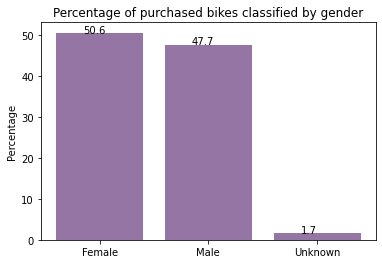

In [53]:
# to calculate the percentage of purchased bikes classified by gender
avg  = [0,0,0]
total   = sum(bike)
for i in range(len(avg)):
    avg[i] += round((round(bike[i]/total,3)*100),3)

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_title('Percentage of purchased bikes classified by gender')
ax1.set_ylabel('Percentage')
plt.bar(x1, avg, color = colour)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))
plt.show()

In [54]:
# to find out the average for female, male and unknown gender
stdv = []
total = 0
temp = [0,0,0]

for each in newcust['gender']:
    j = 1
    if each[0] == "F" and newcust['Age'][j] != 0:
        total += newcust['Age'][j]
        stdv.append((newcust['Age'][j]))
        temp[0] += 1
    elif each[0] == "M" and newcust['Age'][j] != 0:
        total += newcust['Age'][j]
        stdv.append((newcust['Age'][j]))
        temp[1] += 1
    elif newcust['Age'][j] != 0:
        total += newcust['Age'][j]
        stdv.append((newcust['Age'][j]))
        temp[2] += 1
    j+=1
    
print(temp)
# since the count of unknown gender is relatively low compared to female and male, will not take into account of 
# gender u

[513, 470, 17]


In [60]:
# to calculate the average age in general
average = round(total/(temp[0]+ temp[1]),0)
stdv_val = 17.0
print(average)

48.0


The average age is 48
The standard deviation of age is 17

In [68]:
#pruchases from age 42 - 34/2, 42, 42 + 34/2 
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = 42-34/2
sq = 48
tq = 42+34/2
print(fq, sq, tq)

for each in newcust['gender']:
    counter = 1
    temp = int(newcust['Age'][counter])
    bkt  = int(newcust['past_3_years_bike_related_purchases'][counter])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    counter += 1
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

25.0 48 59.0


In [69]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))

61 205 100 147


In [70]:
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

73 172 88 136


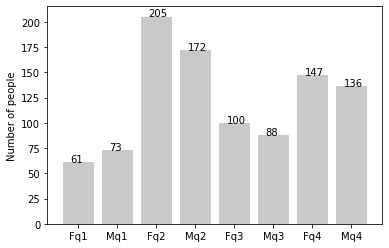

In [71]:
graphgen = [61, 73, 205, 172, 100, 88, 147, 136]
colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))
plt.show()

## Checking the job industry category of our new customer

In [72]:
newcust["job_industry_category"].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

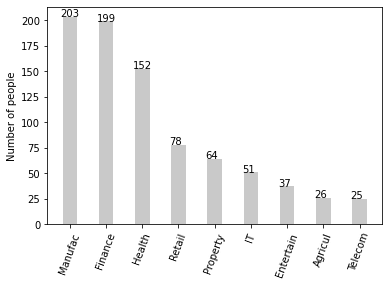

In [78]:
# plotting the bar chart
val = [203, 199, 152, 78, 64, 51, 37, 26, 25]
colorr = (0.7,0.7,0.7,0.7)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manufac", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agricul", "Telecom"))
plt.xticks(rotation=70)
plt.show()

In [74]:
#split into 3: M (Mass), H(High), A(Affluent)
count = 1
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}


for each in CustomerDemo['wealth_segment']:
    temp = int(CustomerDemo['Age'][count])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    count += 1
print("Mass: ", len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print("High: ", len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print("Affluent: ", len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

Mass:  63 190 102 143
High:  30 99 46 74
Affluent:  41 88 106 0


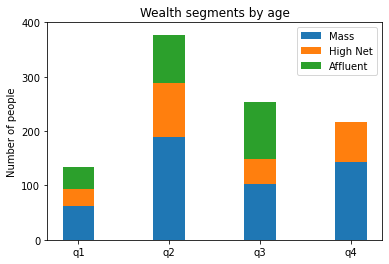

In [76]:
N = 4
mass = [63, 190, 102, 143]
high = [30, 99, 46, 74]
affluent = [41, 88, 106, 0]

bars = np.add(mass, high).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) 
width = 0.35       

p1 = plt.bar(ind, mass, width)
p2 = plt.bar(ind, high, width,  bottom=mass)
p3 = plt.bar(ind, affluent, width,  bottom=bars)

plt.ylabel('Number of people')
plt.title('Wealth segments by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))
plt.show()

## Checking how many of our new customer own a car

In [79]:
newcust["owns_car"].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

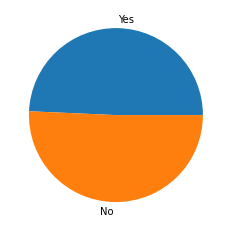

In [80]:
y = np.array([493, 507])
mylabels = ["Yes", "No"]
plt.pie(y, labels = mylabels)
plt.show() 